# **Titanic : Machine Learning from Disaster**

By Priyanka Bandekar (NUID: 001055485)

Dataset imported from the Kaggle competition (https://www.kaggle.com/c/titanic)

### **Abstract :**

The sinking of the Titanic is one of the most infamous shipwrecks in history.

On April 15, 1912, during her maiden voyage, the widely considered “unsinkable” RMS Titanic sank after colliding with an iceberg. Unfortunately, there weren’t enough lifeboats for everyone onboard, resulting in the death of 1502 out of 2224 passengers and crew.

While there was some element of luck involved in surviving, it seems some groups of people were more likely to survive than others.

In this Kaggle challenge, we are asked to build a predictive model which will answer the question: "What sorts of people are more likely to survive?" usinf the passenger data such as name,age,gender,socio-economic class etc.



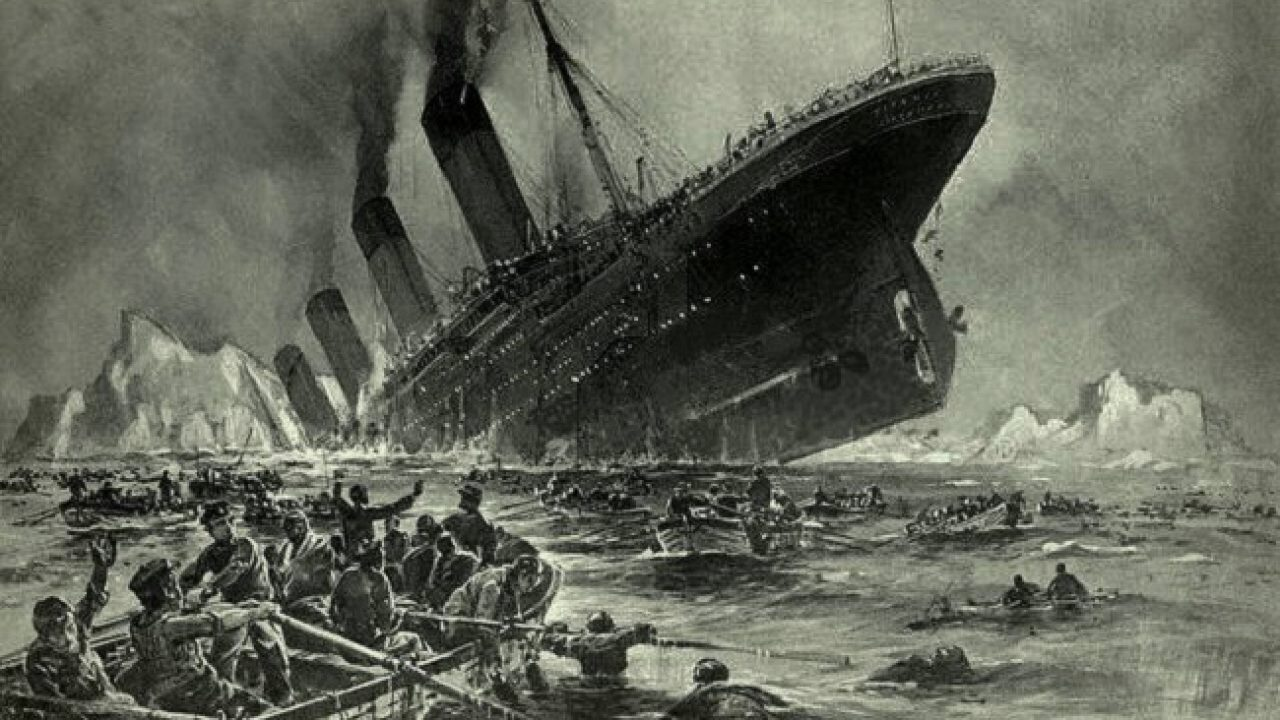

### **Summary :**

The public notebooks with the best scores on Kaggle which I went through followed Automatic EDA,Data Preprocessing & Modeling Techniques compared with Pipelines and RandomSearchCV. 

Some also had Deep Learning, Neural Networks and Tensorflow. The notebooks however I followed which were amongst the top scores had not performed data exploration, so I started with that, filled all the null values, changed the data to numeric. 

The notebooks were also follwing less Machine Learning algorithms, like Logistic Regression, KNN and Random Forest, I went ahead with a lot more ML algorithms to explore the behavior of the dataset to get the best model results out of them all. 

In [ ]:
!pip install kaggle

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"priyankabandekar","key":"5eadd60910780207086b35e12de51870"}'}

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

#Changing the permission
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle competitions download -c titanic

  0% 0.00/28.0k [00:00<?, ?B/s]
100% 28.0k/28.0k [00:00<00:00, 10.8MB/s]
  0% 0.00/3.18k [00:00<?, ?B/s]
100% 3.18k/3.18k [00:00<00:00, 3.02MB/s]
  0% 0.00/59.8k [00:00<?, ?B/s]
100% 59.8k/59.8k [00:00<00:00, 59.9MB/s]


In [ ]:
# Importing the libraries 

# linear algebra 
import numpy as np 

# data processing 
import pandas as pd 

# data visualization 
import seaborn as sns 
%matplotlib inline 
from matplotlib import pyplot as plt 
from matplotlib import style

# Algorithms 
from sklearn import linear_model 
from sklearn.linear_model import LogisticRegression 
from sklearn.ensemble import RandomForestClassifier 
from sklearn.linear_model import Perceptron 
from sklearn.linear_model import SGDClassifier 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.svm import SVC, LinearSVC 
from sklearn.naive_bayes import GaussianNB

In [ ]:
# Assigning existing datasets to variables

df=pd.DataFrame()
gendersub_df = pd.read_csv('gender_submission.csv')
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

### **Data Exploration**

In [ ]:
# Exploring the dataset

train_df.info()

# We see that the train dataset has 891 examples, 11 features and the (survived) target variables. 
# 2 features are float, 5 are integers  and 5 of them are objects.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
#Using Pandas describe() to view some basic statistical details 

train_df.describe()

#We see that a 38% people in the Train dataset have survived the Titanic.
#We also see that the passenger age ranges from 0.42 to 0.80

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
#Exloring first 10 rows of the Train dataset

train_df.head(10)

#We see that some features are containing missing values, like Age, Cabin

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [ ]:
# We need to convert a lot of features into numeric data so that we can perform Machine Learning Algorithms on it. 
# Taking a look at what data is missing

total = train_df.isnull().sum().sort_values(ascending=False) 
percent_1 = train_df.isnull().sum()/train_df.isnull().count()*100 
percent_2 = (round(percent_1, 1)).sort_values(ascending=False) 
missing_data = pd.concat([total, percent_2], axis=1, keys=['Total', '%']) 
missing_data.head(5)

,Total,%
Cabin,687,77.1
Age,177,19.9
Embarked,2,0.2
Fare,0,0.0
Ticket,0,0.0


Through the analysis  we see that the feature 'Embarked' has only 2 missing values, which can be filled. But we cannot do the same for Cabin and Age as both the features have a lot of missing values.

In [ ]:
# Getting all the column values

train_df.columns.values

# Below we see the 11 features, we now need to see what features can contribute to high survival rate

array(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'], dtype=object)

According to the observations made, I feel like "Ticket", "Name" and "PassengerID" would not contribute to a high survival rate. So, let us check the other features.

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

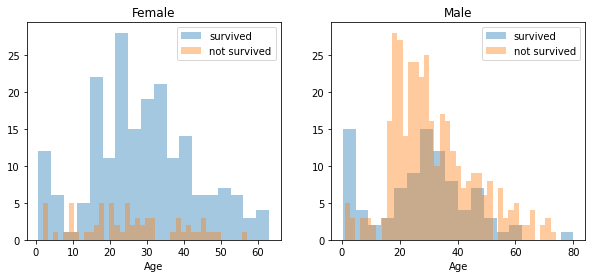

In [ ]:
#Checking for the features "Age" and "Sex"

survived = 'survived' 
not_survived = 'not survived' 
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(10, 4)) 
women = train_df[train_df['Sex']=='female'] 
men = train_df[train_df['Sex']=='male'] 
ax = sns.distplot(women[women['Survived']==1].Age.dropna(), bins=18, label = survived, ax = axes[0], kde =False) 
ax = sns.distplot(women[women['Survived']==0].Age.dropna(), bins=40, label = not_survived, ax = axes[0], kde =False) 
ax.legend() 
ax.set_title('Female') 
ax = sns.distplot(men[men['Survived']==1].Age.dropna(), bins=18, label = survived, ax = axes[1], kde = False) 
ax = sns.distplot(men[men['Survived']==0].Age.dropna(), bins=40, label = not_survived, ax = axes[1], kde = False) 
ax.legend() 
_ = ax.set_title('Male')




Men between ages 18 to 30 are the ones who survived the most and women between the age of 14 to 40 were the ones who had a high survival rate. We also see that infants have a high probability of survival.

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


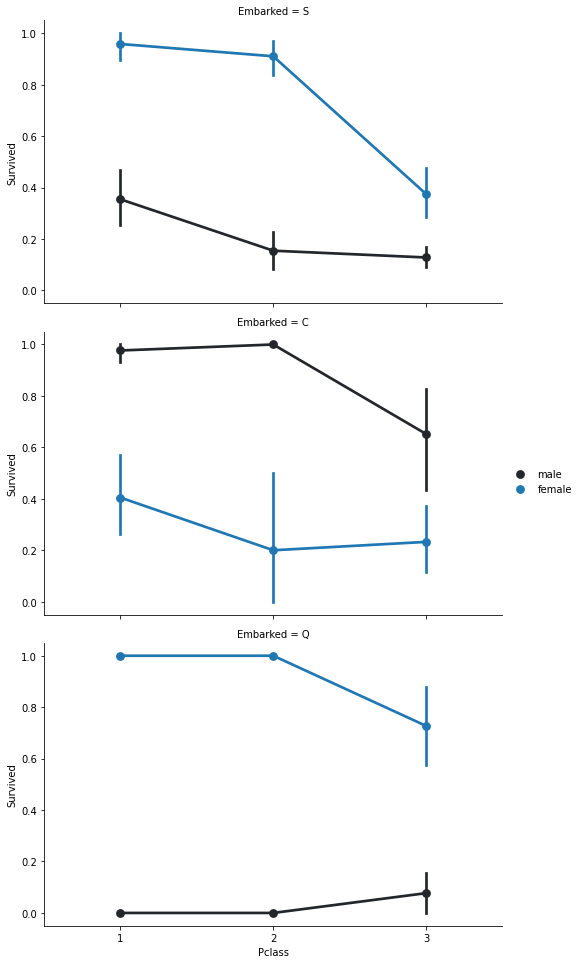

In [ ]:
#Checking for the features Embarked, Pclass and Sex

FacetGrid = sns.FacetGrid(train_df, row='Embarked', size=4.5, aspect=1.6) 
FacetGrid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette=None,  order=None, hue_order=None ) 
FacetGrid.add_legend()

**Observations from the above visualization tells us that the feature 'Embarked' is correlated with 'Survival' based on the gender of the passenger.**

**Women on port Q and S have a high survival chance while Men if they are at port C. Women have a low survival chance on port C and Men have a low survival chance on port Q and S.**

**The Pclass also seems to be correlated with the survival.**



**Pclass**

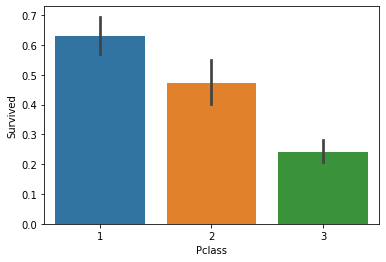

In [ ]:
# Generating a bar plot of Pclass 

sns.barplot(x='Pclass', y='Survived', data=train_df)

After the above visualiztion we see that Pclass is hugely contributing to a persons survival chance. The higher the class, more the chances of survival.

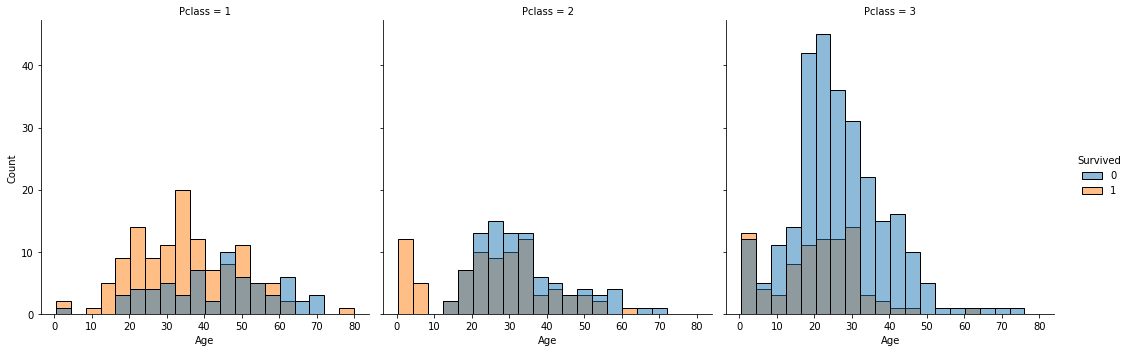

In [ ]:
# Creating another Pclass plot to confirm the above observation.

sns.displot(data=train_df, x="Age", hue="Survived", col="Pclass")



The bold text plot above is confirming the result that in Pclass 1 there were many survivors and Pclass 3 there were very few survivors based on the amount of people who were present in all the Pclasses.

**Data Preprocessing**

In [ ]:
# Dropping 'PassengerId' from the train set as it is not contributing to a persons survival chance. We are not dropiing 
# it from the test set as we need that feature there.

train_df = train_df.drop(['PassengerId'], axis=1)

**Missing Data:**

We have some missing data in some of the features like Cabin:687, Embarked:2, Age:177. </br>

We will fix that!

For feature 'Cabin' :

A cabin number looks like ‘C123’ and the letter refers to the deck. Therefore we’re going to extract these and create a new feature, that contains a persons deck. Afterwords we will convert the feature into a numeric variable. The missing values will be converted to zero. From the data, we know that the actual decks of the titanic range from A to G.

In [ ]:
import re 
deck = {"A": 1, "B": 2, "C": 3, "D": 4, "E": 5, "F": 6, "G": 7, "U": 8} 
data = [train_df, test_df]
for dataset in data: 
    dataset['Cabin'] = dataset['Cabin'].fillna("U0") 
    dataset['Deck'] = dataset['Cabin'].map(lambda x: re.compile("([a-zA-Z]+)").search(x).group()) 
    dataset['Deck'] = dataset['Deck'].map(deck) 
    dataset['Deck'] = dataset['Deck'].fillna(0) 
    dataset['Deck'] = dataset['Deck'].astype(int)



In [ ]:
# We can now drop the cabin feature 
train_df = train_df.drop(['Cabin'], axis=1) 
test_df = test_df.drop(['Cabin'], axis=1)

**Age:**

To replace the missing values, we will create an array that contains random numbers, which are computed based on the mean age value in regards to the standard deviation and is_null.

In [ ]:
data = [train_df, test_df]
for dataset in data: 
    mean = train_df["Age"].mean() 
    std = test_df["Age"].std() 
    is_null = dataset["Age"].isnull().sum() 
# compute random numbers between the mean, std and is_null 
    rand_age = np.random.randint(mean - std, mean + std, size = is_null) 
# fill NaN values in Age column with random values generated 
    age_slice = dataset["Age"].copy() 
    age_slice[np.isnan(age_slice)] = rand_age 
    dataset["Age"] = age_slice 
    dataset["Age"] = train_df["Age"].astype(int)

train_df["Age"].isnull().sum()

0

**Embarked:**

Since the Embarked feature has only 2 missing values, we will just fill these with the most common one.

In [ ]:
train_df['Embarked'].describe()

count     889
unique      3
top         S
freq      644
Name: Embarked, dtype: object

In [ ]:
common_value = 'S' 
data = [train_df, test_df]
for dataset in data: 
    dataset['Embarked'] = dataset['Embarked'].fillna(common_value)

**Converting Features:**

In [ ]:
train_df.info()

# Below we see that ‘Fare’ is a float and we have to deal with 4 categorical 
# features: Name, Sex, Ticket and Embarked. Lets investigate and transfrom one after another.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       891 non-null    int64  
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Embarked  891 non-null    object 
 10  Deck      891 non-null    int64  
dtypes: float64(1), int64(6), object(4)
memory usage: 76.7+ KB


In [ ]:
# Fare:
# Converting “Fare” from float to int64, using the “astype()” function pandas provides:

data = [train_df, test_df]
for dataset in data: 
    dataset['Fare'] = dataset['Fare'].fillna(0) 
    dataset['Fare'] = dataset['Fare'].astype(int)

In [ ]:
#Name:
# We will use the Name feature to extract the Titles from the Name, so that we can build a new feature out of that.


data = [train_df, test_df] 
titles = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}
for dataset in data: 
# extract titles 
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False) 
# replace titles with a more common title or as Rare 
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col','Don', 'Dr','Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare') 
    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss') 
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss') 
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs') 
# convert titles into numbers 
    dataset['Title'] = dataset['Title'].map(titles) 
# filling NaN with 0, to get safe 
    dataset['Title'] = dataset['Title'].fillna(0)

train_df = train_df.drop(['Name'], axis=1) 
test_df = test_df.drop(['Name'], axis=1)

In [ ]:
# Sex:
# Convert ‘Sex’ feature into numeric.

genders = {"male": 0, "female": 1} 
data = [train_df, test_df]
for dataset in data: 
    dataset['Sex'] = dataset['Sex'].map(genders)

In [ ]:
#Ticket:

train_df['Ticket'].describe()

# Since Ticket has 681 unique values we will drop them from the dataset as it can get a bit risky.

count        891
unique       681
top       347082
freq           7
Name: Ticket, dtype: object

In [ ]:
train_df = train_df.drop(['Ticket'], axis=1) 
test_df = test_df.drop(['Ticket'], axis=1)

In [ ]:
# Embarked:
# Convert ‘Embarked’ feature into numeric.

ports = {"S": 0, "C": 1, "Q": 2} 
data = [train_df, test_df]
for dataset in data: 
    dataset['Embarked'] = dataset['Embarked'].map(ports)

**Creating Categories:**


We will now create categories within the following features:



**Fare:**

For the ‘Fare’ feature, we need to do the same as with the ‘Age’ feature. But it isn’t that easy, because if we cut the range of the fare values into a few equally big categories, 80% of the values would fall into the first category. Fortunately, we can use sklearn “qcut()” function, that we can use to see, how we can form the categories.

In [ ]:
train_df.head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Deck,Title
0,0,3,0,22,1,0,7,0,8,1
1,1,1,1,38,1,0,71,1,3,3
2,1,3,1,26,0,0,7,0,8,2
3,1,1,1,35,1,0,53,0,3,3
4,0,3,0,35,0,0,8,0,8,1
5,0,3,0,22,0,0,8,2,8,1
6,0,1,0,54,0,0,51,0,5,1
7,0,3,0,2,3,1,21,0,8,4
8,1,3,1,27,0,2,11,0,8,3
9,1,2,1,14,1,0,30,1,8,3


In [ ]:
data = [train_df, test_df]
for dataset in data: 
    dataset.loc[ dataset['Fare'] <= 7.91, 'Fare'] = 0 
    dataset.loc[(dataset['Fare'] > 7.91) & (dataset['Fare'] <= 14.454), 'Fare'] = 1 
    dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare'] <= 31), 'Fare']   = 2 
    dataset.loc[(dataset['Fare'] > 31) & (dataset['Fare'] <= 99), 'Fare']   = 3 
    dataset.loc[(dataset['Fare'] > 99) & (dataset['Fare'] <= 250), 'Fare']   = 4 
    dataset.loc[ dataset['Fare'] > 250, 'Fare'] = 5 
    dataset['Fare'] = dataset['Fare'].astype(int)

**Building Machine Learning Models** <br>
<br>
Now we will train several Machine Learning models and compare their results. Note that because the dataset does not provide labels for their testing-set, we need to use the predictions on the training set to compare the algorithms with each other. Later on, we will use cross validation.

In [ ]:
X_train = train_df.drop("Survived", axis=1) 
Y_train = train_df["Survived"] 
X_test  = test_df.drop("PassengerId", axis=1).copy()

Stochastic Gradient Descent (SGD):



In [ ]:
import sklearn
from sklearn import linear_model

sgd = linear_model.SGDClassifier(max_iter=5, tol=None) 
sgd.fit(X_train, Y_train) 
Y_pred = sgd.predict(X_test)
sgd.score(X_train, Y_train)

acc_sgd = round(sgd.score(X_train, Y_train) * 100, 2)

**Random Forest:**

In [ ]:
random_forest = RandomForestClassifier(n_estimators=100) 
random_forest.fit(X_train, Y_train)
Y_prediction = random_forest.predict(X_test)

random_forest.score(X_train, Y_train) 
acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)

**Logistic Regression:**

In [ ]:
logreg = LogisticRegression() 
logreg.fit(X_train, Y_train)
Y_pred = logreg.predict(X_test)

acc_log = round(logreg.score(X_train, Y_train) * 100, 2)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


**K Nearest Neighbor:**

In [ ]:
# KNN
from sklearn.neighbors import KNeighborsClassifier


knn = KNeighborsClassifier(n_neighbors = 3) 
knn.fit(X_train, Y_train)  
Y_pred = knn.predict(X_test)  
acc_knn = round(knn.score(X_train, Y_train) * 100, 2)

**Gaussian Naive Bayes:**

In [ ]:
from sklearn.naive_bayes import GaussianNB
gaussian = GaussianNB() 
gaussian.fit(X_train, Y_train)  
Y_pred = gaussian.predict(X_test)  
acc_gaussian = round(gaussian.score(X_train, Y_train) * 100, 2)

**Perceptron:**

In [ ]:
from sklearn.datasets import load_digits
from sklearn.linear_model import Perceptron

perceptron = Perceptron(max_iter=5) 
perceptron.fit(X_train, Y_train)
Y_pred = perceptron.predict(X_test)

acc_perceptron = round(perceptron.score(X_train, Y_train) * 100, 2)



/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


**Linear Support Vector Machine:**

In [ ]:
from sklearn.svm import LinearSVC
linear_svc = LinearSVC() 
linear_svc.fit(X_train, Y_train)
Y_pred = linear_svc.predict(X_test)

acc_linear_svc = round(linear_svc.score(X_train, Y_train) * 100, 2)

/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


**Decision Tree:**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
decision_tree = DecisionTreeClassifier() 
decision_tree.fit(X_train, Y_train)  
Y_pred = decision_tree.predict(X_test)  
acc_decision_tree = round(decision_tree.score(X_train, Y_train) * 100, 2)

**Our best Model ?**

In [ ]:
results = pd.DataFrame({ 
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression',  
              'Random Forest', 'Naive Bayes', 'Perceptron',  
              'Stochastic Gradient Decent',  
              'Decision Tree'], 
    'Score': [acc_linear_svc, acc_knn, acc_log,  
              acc_random_forest, acc_gaussian, acc_perceptron,  
              acc_sgd, acc_decision_tree]}) 
result_df = results.sort_values(by='Score', ascending=False) 
result_df = result_df.set_index('Score') 
result_df.head(9)

,Model
Score,
96.41,Random Forest
96.41,Decision Tree
87.99,KNN
81.48,Support Vector Machines
81.48,Logistic Regression
78.23,Naive Bayes
77.22,Perceptron
68.80,Stochastic Gradient Decent


**We see that Random Forest classifier leads with 96% accuracy. Let us see how Random Forest performs when we perform Cross Validation on it.**

**K-Fold Cross Validation:**

In [ ]:
#The result of our K-Fold Cross Validation example would be an array that contains 
# 4 different scores. We then need to compute the mean and the standard deviation for these scores.

#The code below perform K-Fold Cross Validation on our random forest model, using 10 folds (K = 10). 
#Therefore it outputs an array with 10 different scores.

from sklearn.model_selection import cross_val_score 
rf = RandomForestClassifier(n_estimators=100) 
scores = cross_val_score(rf, X_train, Y_train, cv=10, scoring = "accuracy")
print("Scores:", scores) 
print("Mean:", scores.mean()) 
print("Standard Deviation:", scores.std())

Scores: [0.74444444 0.84269663 0.76404494 0.84269663 0.82022472 0.82022472
 0.80898876 0.79775281 0.84269663 0.83146067]
Mean: 0.8115230961298379
Standard Deviation: 0.032270846135096565


This looks much more realistic than before. Our model has a **average accuracy of 81% with a standard deviation of 3.2 %.** The standard deviation shows us, how precise the estimates are .

This means in our case that the accuracy of our model can differ + — 3.2%.

I think the accuracy is still really good and since random forest is an easy to use model, we will try to increase it’s performance even further in the following section.

**Feature Importance:** <br>
<br>
The feature importance or variable importance tells us which feature is relevant. Sklearn measure a features importance by looking at how much the treee nodes, that use that feature, reduce impurity on average. Random Forest makes it easy to measure the relative importance of each feature. 

In [ ]:
importances = pd.DataFrame({'feature':X_train.columns,'importance':np.round(random_forest.feature_importances_,3)}) 
importances = importances.sort_values('importance',ascending=False).set_index('feature')
importances.head(15)

,importance
feature,
Age,0.286
Title,0.186
Sex,0.155
Pclass,0.088
Fare,0.082
Deck,0.069
SibSp,0.058
Embarked,0.040
Parch,0.035


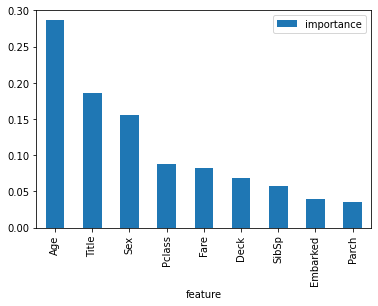

In [ ]:
# Plotting a bar to show the above observation

importances.plot.bar()

**Conclusion:**<br>
<br>
Parch doesn’t play a significant role in our random forest classifiers prediction process.We will drop it from the dataset and train the classifier again. 

In [ ]:
# Dropping 'Parch' from the train and test data

train_df  = train_df.drop("Parch", axis=1) 
test_df  = test_df.drop("Parch", axis=1)

**Training random forest again:**

In [ ]:
# Random Forest
random_forest = RandomForestClassifier(n_estimators=100, oob_score = True) 
random_forest.fit(X_train, Y_train) 
Y_prediction = random_forest.predict(X_test)

random_forest.score(X_train, Y_train)

acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2) 
print(round(acc_random_forest,2,), "%")

96.41 %


**Random Forest is giving us same predictions as before. There is one more way we can try to evaluate Random Forest to improve the score. We can take out-of-bag
samples to estimate the generalization accuracy.(Using oob error estimates to remove the need to set aside the test set.)**





In [ ]:
print("oob score:", round(random_forest.oob_score_, 4)*100, "%")

oob score: 80.36 %


Now we can start tuning the hyperameters of random forest.

**Hyperparameter Tuning** <br>
<br>
Below you can see the code of the hyperparamter tuning for the parameters criterion, min_samples_leaf, min_samples_split and n_estimators.


In [ ]:
param_grid = { "criterion" : ["gini", "entropy"], "min_samples_leaf" : [1, 5, 10, 25, 50, 70], "min_samples_split" : [2, 4, 10, 12, 16, 18, 25, 35], "n_estimators": [100, 400, 700, 1000, 1500]}
from sklearn.model_selection import GridSearchCV 
cross_val_scorerf = RandomForestClassifier(n_estimators=100, max_features='auto', oob_score=True, random_state=1, n_jobs=-1)
clf = GridSearchCV(estimator=rf, param_grid=param_grid, n_jobs=-1)
clf.fit(X_train, Y_train)
clf.best_params_

# P.S this took 40 mins to execute!!!!


#Ref : https://scikit-learn.org/0.17/modules/generated/sklearn.grid_search.GridSearchCV.html#sklearn.grid_search.GridSearchCV

{'criterion': 'entropy',
 'min_samples_leaf': 5,
 'min_samples_split': 10,
 'n_estimators': 100}

**Test new Parameters:**

In [ ]:
# Random Forest 
random_forest = RandomForestClassifier(criterion = "gini",  
                                       min_samples_leaf = 1,  
                                       min_samples_split = 10,    
                                       n_estimators=100,  
                                       max_features='auto',  
                                       oob_score=True,  
                                       random_state=1,  
                                       n_jobs=-1)
random_forest.fit(X_train, Y_train) 
Y_prediction = random_forest.predict(X_test)

random_forest.score(X_train, Y_train)
print("oob score:", round(random_forest.oob_score_, 4)*100, "%")

oob score: 82.94 %


Now that we have a proper model, we can start evaluating it’s performace in a more accurate way. Previously we only used accuracy and the oob score, which is just another form of accuracy. The problem is just, that it’s more complicated to evaluate a classification model than a regression model. We will talk about this in the following section.

# **Further Evaluation**

**Confusion Matrix:**

In [ ]:
from sklearn.model_selection import cross_val_predict 
from sklearn.metrics import confusion_matrix 
predictions = cross_val_predict(random_forest, X_train, Y_train, cv=3) 
confusion_matrix(Y_train, predictions)

array([[491,  58],
       [ 96, 246]])

The first row is about the not-survived-predictions: 491 passengers were correctly classified as not survived (called true negatives) and 53 where wrongly classified as not survived (false positives).

The second row is about the survived-predictions: 96 passengers where wrongly classified as survived (false negatives) and 245 where correctly classified as survived (true positives).


**Precision and Recall:**

In [ ]:
from sklearn.metrics import precision_score, recall_score
print("Precision:", precision_score(Y_train, predictions)) 
print("Recall:",recall_score(Y_train, predictions))

Precision: 0.8092105263157895
Recall: 0.7192982456140351


Our model predicts 80% of the time, a passengers survival correctly (precision). The recall tells us that it predicted the survival of 71 % of the people who actually survived.

**F-Score** <br>
We can combine precision and recall into one score, which is called the F-score. The F-score is computed with the harmonic mean of precision and recall. Note that it assigns much more weight to low values. As a result of that, the classifier will only get a high F-score, if both recall and precision are high.

In [ ]:
from sklearn.metrics import f1_score 
f1_score(Y_train, predictions)

0.7616099071207432

There we have it, a 76 % F-score. The score is not that high, because we have a recall of 71%. But unfortunately the F-score is not perfect, because it favors classifiers that have a similar precision and recall. This is a problem, because you sometimes want a high precision and sometimes a high recall. The thing is that an increasing precision, sometimes results in an decreasing recall and vice versa (depending on the threshold). This is called the precision/recall tradeoff. We will discuss this in the following section.



**Precision Recall Curve**

For each person the Random Forest algorithm has to classify, it computes a probability based on a function and it classifies the person as survived (when the score is bigger the than threshold) or as not survived (when the score is smaller than the threshold). That’s why the threshold plays an important part.

Plotting the precision and recall with the threshold using matplotlib:

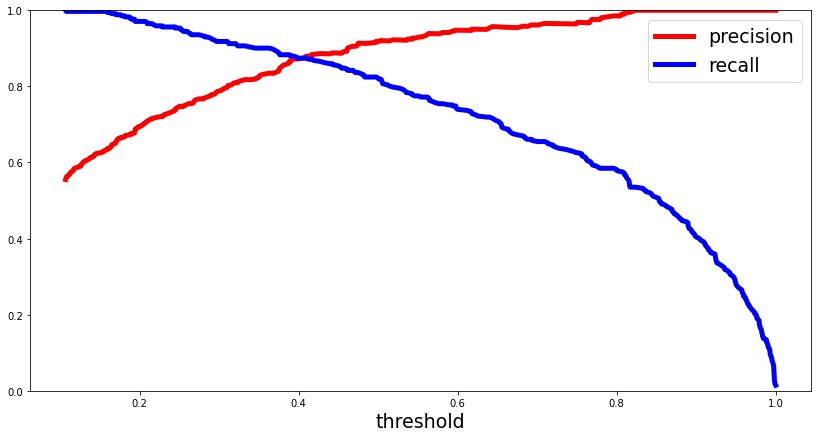

In [ ]:
from sklearn.metrics import precision_recall_curve
# getting the probabilities of our predictions 
y_scores = random_forest.predict_proba(X_train) 
y_scores = y_scores[:,1]

precision, recall, threshold = precision_recall_curve(Y_train, y_scores)

def plot_precision_and_recall(precision, recall, threshold): 
    plt.plot(threshold, precision[:-1], "r-", label="precision", linewidth=5) 
    plt.plot(threshold, recall[:-1], "b", label="recall", linewidth=5) 
    plt.xlabel("threshold", fontsize=19) 
    plt.legend(loc="upper right", fontsize=19) 
    plt.ylim([0, 1])
plt.figure(figsize=(14, 7)) 
plot_precision_and_recall(precision, recall, threshold) 
plt.show()

We see that the recall is falling of rapidly at a precision of around 85%. Because of that you may want to select the precision/recall tradeoff before that — maybe at around 75 %.

We can now choose a threshold, that gives us the best precision/recall tradeoff for Random Forest. 

If we want a precision of 80%, we see the plots and see that you would need a threshold of around 0.4. Then we could train a model with exactly that threshold and would get the desired accuracy.

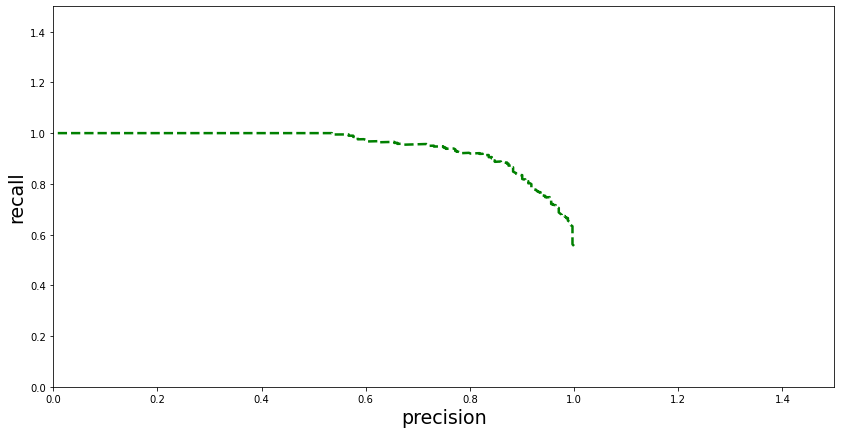

In [ ]:
#Another way is to plot the precision and recall against each other:

def plot_precision_vs_recall(precision, recall): 
    plt.plot(recall, precision, "g--", linewidth=2.5) 
    plt.ylabel("recall", fontsize=19) 
    plt.xlabel("precision", fontsize=19) 
    plt.axis([0, 1.5, 0, 1.5])
plt.figure(figsize=(14, 7)) 
plot_precision_vs_recall(precision, recall) 
plt.show()

**ROC AUC Curve** <br>
<br>
Another way to evaluate and compare the binary classifier is provided by the ROC AUC Curve. This curve plots the true positive rate(recall) against the false positive rate.

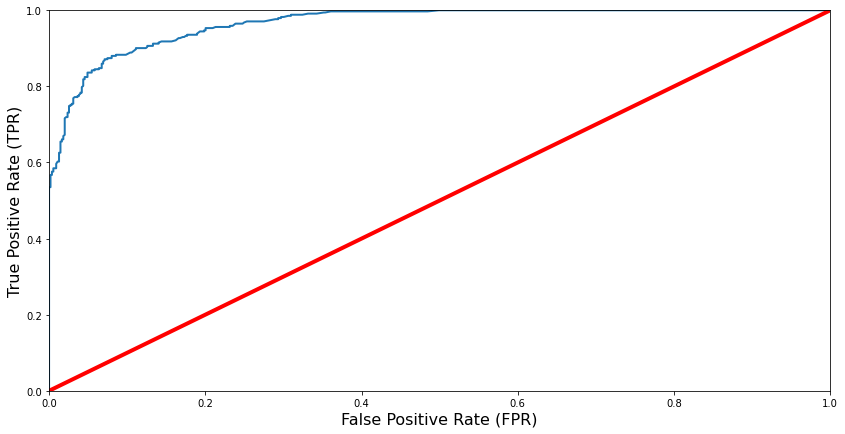

In [ ]:
from sklearn.metrics import roc_curve 
# compute true positive rate and false positive rate 
false_positive_rate, true_positive_rate, thresholds = roc_curve(Y_train, y_scores)# plotting them against each other 
def plot_roc_curve(false_positive_rate, true_positive_rate, label=None): 
    plt.plot(false_positive_rate, true_positive_rate, linewidth=2, label=label) 
    plt.plot([0, 1], [0, 1], 'r', linewidth=4) 
    plt.axis([0, 1, 0, 1]) 
    plt.xlabel('False Positive Rate (FPR)', fontsize=16) 
    plt.ylabel('True Positive Rate (TPR)', fontsize=16)
plt.figure(figsize=(14, 7)) 
plot_roc_curve(false_positive_rate, true_positive_rate) 
plt.show()

The red line in the middel represents a purely random classifier and therefore the classifier should be as far away from it as possible.  Random Forest model here is doing a good job.

But we also have a trade-off because the classifier produces more false positives, the higher the true positive rate is.

**ROC AUC Score** <br>
<br>

The ROC AUC Score is the corresponding score to the ROC AUC Curve. It is simply computed by measuring the area under the curve, which is called AUC.

A classifiers that is 100% correct, would have a ROC AUC Score of 1 and a completely random classiffier would have a score of 0.5.

In [ ]:
from sklearn.metrics import roc_auc_score 
r_a_score = roc_auc_score(Y_train, y_scores) 
print("ROC-AUC-Score:", r_a_score)

ROC-AUC-Score: 0.9659322106115319


We see that the ROC-AUC-Score is 96%





### **Conclusion** 

We first began with data exploration for the Titanic dataset and as we went ahead with it we saw that there were many **missing values** everywhere. We then figured out what **features could be important** and used **seaborn and matplotlib** to show the observations via **visualizations.**

We also found the missing values and **filled them we appropriate values**, **converted** the features into **numeric values**. 

We trained **8 different Machine Learning models**, namely Random Forest, Decision Tree, K-Nearest Neighbors, Logistic Regression, Support Vector Machines, Perceptron, Naïve Bayes and Stochastic Gradient Decent and found out that **Random Forest was the best** one out of all.

We then proceeded to apply **cross validation** on Random Forest, saw its **feature importance, tuned the performance using Hyperparameter tuning.**

We also saw the **Confusion matrix, model precision for Random Forest, recall and the f-score.**



### **Some steps to submit the data on Kaggle:**

In [ ]:
y_predicted = random_forest.predict(train_df)

In [ ]:
# Preparing the submission file

submission = pd.DataFrame({"Pclass": train_df['Pclass'],"Survived":y_predicted})  

In [ ]:
submission.to_csv('TitanicFinal.csv',index=False)

### **Contributions:**

About 50% of this entire project is inspired by the Kaggle notebooks :
1. https://www.kaggle.com/akylson/titanic-survivors-by-akylson
2. https://www.kaggle.com/alexisbcook/titanic-tutorial
3. https://www.kaggle.com/pedrodematos/titanic-a-complete-data-science-approach



**Submission made on Kaggle:**

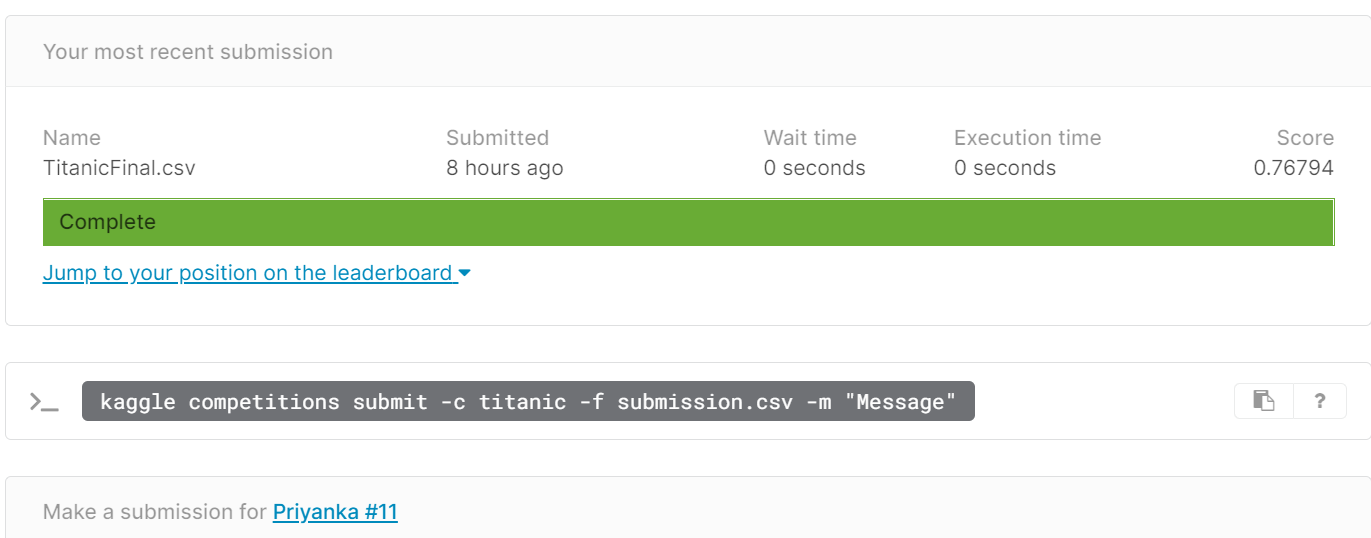

Top 22 % which means that there is a 7 % deduction or 0.93 * 50 = 46.5 points

### **Citations :**


1. Alexisbcook. (2020, April 01). Titanic Tutorial. Retrieved October 11, 2020, from https://www.kaggle.com/alexisbcook/titanic-tutorial 

2. Vic13, Vic13Vic13 29911 gold badge33 silver badges1212 bronze badges, &amp; Mikhail StepanovMikhail Stepanov 2. (1967, December 01). ValueError: X has 1709 features per sample; expecting 2444. Retrieved October 11, 2020, from https://stackoverflow.com/questions/52150800/valueerror-x-has-1709-features-per-sample-expecting-2444

3. Scatterplot Matrix¶. (n.d.). Retrieved October 11, 2020, from https://seaborn.pydata.org/examples/scatterplot_matrix.html

4. Sklearn.grid_search.GridSearchCV¶. (n.d.). Retrieved October 12, 2020, from https://scikit-learn.org/0.17/modules/generated/sklearn.grid_search.GridSearchCV.html

5. Donges, N. (2018, May 15). Predicting the Survival of Titanic Passengers. Retrieved October 12, 2020, from towardsdatascience.

6. Sklearn.linear_model.Perceptron¶. (n.d.). Retrieved October 12, 2020, from https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Perceptron.html

7. Overview of seaborn plotting functions¶. (n.d.). Retrieved October 12, 2020, from https://seaborn.pydata.org/tutorial/function_overview.html

8. https://www.kaggle.com/akylson/titanic-survivors-by-akylson

9. https://www.kaggle.com/pedrodematos/titanic-a-complete-data-science-approach


**MIT License**

**Copyright (c) [2020] [Priyanka Bandekar]**

Permission is hereby granted, free of charge, to any person obtaining a copy
of this software and associated documentation files (the "Software"), to deal
in the Software without restriction, including without limitation the rights
to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
copies of the Software, and to permit persons to whom the Software is
furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all
copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,
OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE
SOFTWARE.